In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm , chi2
from matplotlib import pyplot as plt

In [24]:
ddof = [1 ,2 , 3 ,4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 50 , 40]

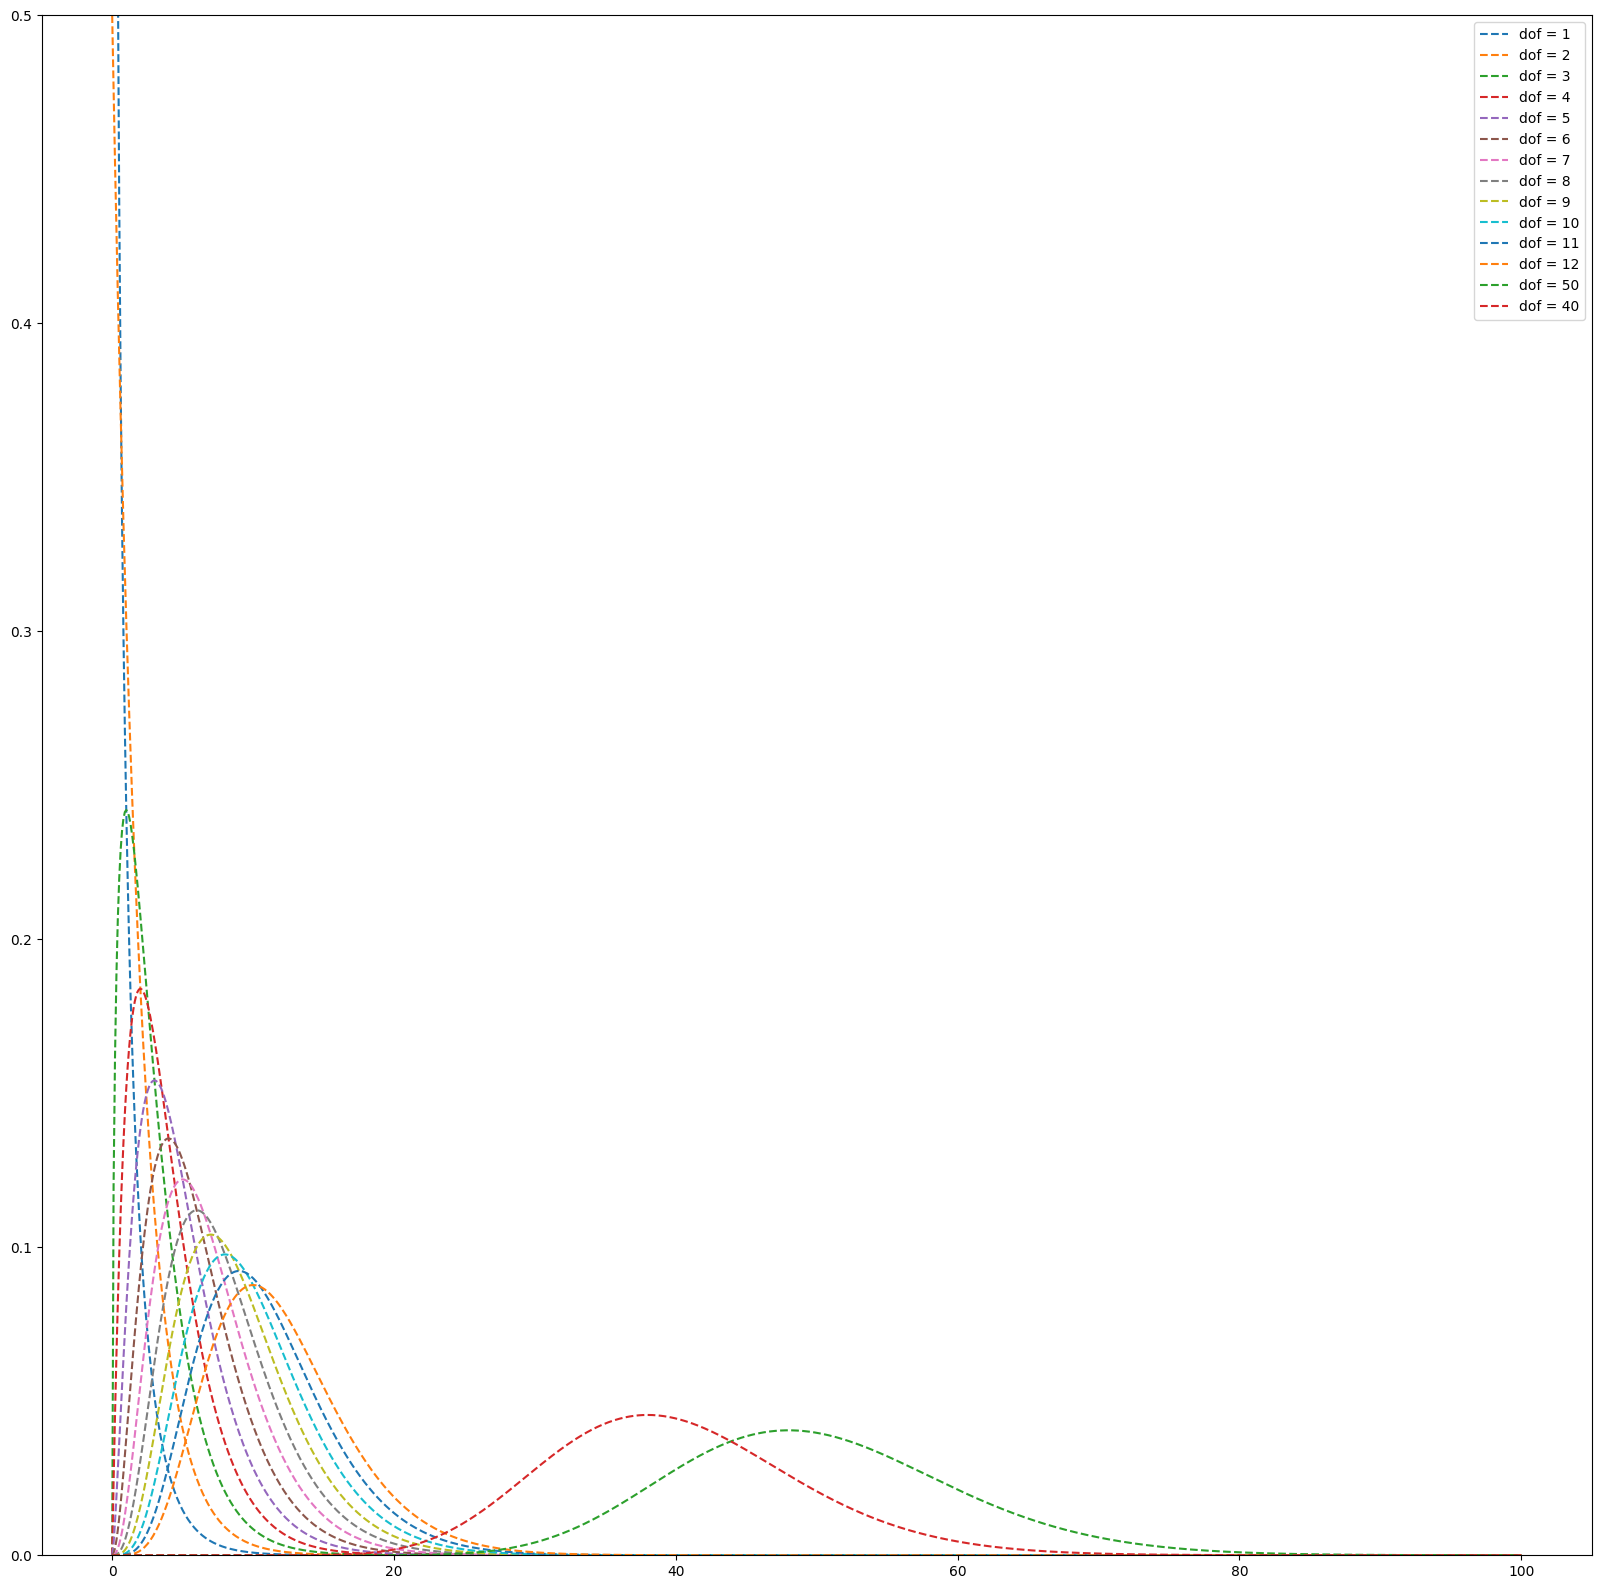

In [25]:
x = np.linspace( 0 , 100 , 1000)
plt.figure(figsize=(20,20))
for dof in ddof :
    y = chi2.pdf(x , dof)
    plt.plot(x , y , '--' , label = f'dof = {dof}')
plt.ylim(0,0.5)
plt.legend()
plt.show()